In [1]:
import numpy as np
import matplotlib.pyplot as plt

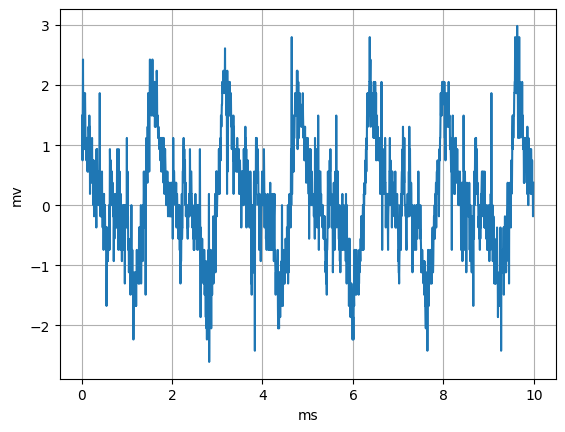

In [70]:
# Nr.1

inputCSV_path = "./MessungenVersuch3/Versuch_1_Ton-0001/Versuch_1_Ton-0001_06.csv"

with open(inputCSV_path, "r") as f:
    lines = f.read().splitlines()[3:]

temp = []
for x in lines:
    temp.append([float(y.replace(",", ".")) for y in x.split(";")])
lines = temp.copy()

ms = []
mv = []
for x in lines:
    ms.append(x[0])
    mv.append(x[1])

plt.plot(ms[5005:7000], mv[5005:7000])
plt.xlabel("ms")
plt.ylabel("mv")
plt.grid(True)
plt.show()

In [30]:
print("Grundperiode ≈ 7.85 - 6.25 = 1.6 (ms)")
print("Grundfrequenz ≈ 1000 / 1.6 = 625 (Hz)")
print("Signaldauer =  25.00499968 - (-25.00999905) = 0.050014999 (s)")
print("Abtastfrequenz = 1000 / (25.00499968 - 24.99999968) = 1000 / 0.005 = 200'000 (Hz)")
print("Signallänge M = 0.050014999 / 0.000005 = 10'003")
print("Abtastintervall Δt = 0.000005 (s)")

Grundperiode ≈ 7.85 - 6.25 = 1.6 (ms)
Grundfrequenz ≈ 1000 / 1.6 = 625 (Hz)
Signaldauer =  25.00499968 - (-25.00999905) = 0.050014999 (s)
Abtastfrequenz = 1000 / (25.00499968 - 24.99999968) = 1000 / 0.005 = 200'000 (Hz)
Signallänge M = 0.050014999 / 0.000005 = 10'003
Abtastintervall Δt = 0.000005 (s)


(10004,)
(10004,)


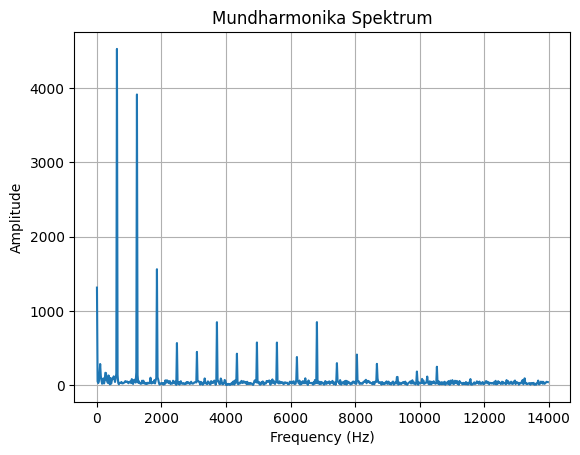

In [50]:
# Nr.2

mv_array = np.array(mv)
fft_values = np.fft.fft(mv_array)
frequencies = np.fft.fftfreq(len(mv_array), d=(ms[1] - ms[0]) / 1000)


plt.plot(frequencies[:700], np.abs(fft_values[:700]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.title("Mundharmonika Spektrum")
plt.show()

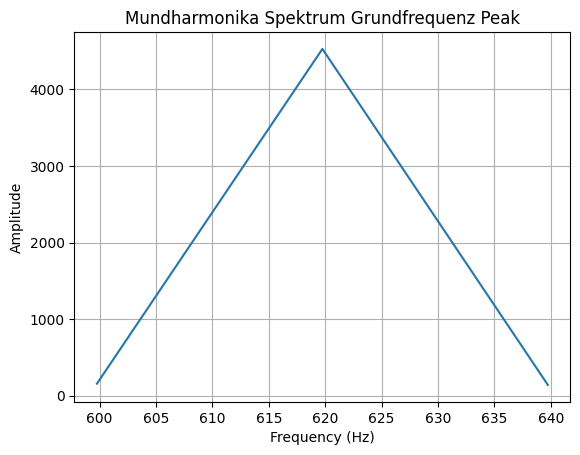

Grundfrequenz = 619.5 (Hz)


In [67]:
plt.plot(frequencies[30:33], np.abs(fft_values[30:33]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.title("Mundharmonika Spektrum Grundfrequenz Peak")
plt.show()

print("Grundfrequenz = 619.5 (Hz)")

(3882.6333859790707+506.58371180633344j)
